In [101]:
markets = [
    'ACB.VN',
    'BCM.VN',
    'BID.VN',
    'BVH.VN',
    'CTG.VN',
    'FPT.VN',
    'GAS.VN',
    'GVR.VN',
    'HDB.VN',
    'HPG.VN',
    'MBB.VN',
    'MSN.VN',
    'MWG.VN',
    'PLX.VN',
    'POW.VN',
    'SAB.VN',
    'SHB.VN',
    'SSB.VN',
    'SSI.VN',
    'STB.VN',
    'TCB.VN',
    'TPB.VN',
    'VCB.VN',
    'VHM.VN',
    'VIB.VN',
    'VIC.VN',
    'VJC.VN',
    'VNM.VN',
    'VPB.VN',
    'VRE.VN',
]

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
import yfinance as yf

data = []
for stock in markets:
    data.append(yf.download(stock, start="2023-01-01", end="2024-04-1"))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

**HÀM NÀY DÙNG ĐỂ LẤY BIẾN ĐỘNG GIÁ CẢ TRONG KHOẢNG TỪ START ĐẾN END DATE**

Như vậy thời gian giao dịch chứng khoán cơ sở tại Việt Nam là:

Ngày giao dịch: Từ thứ Hai đến thứ Sáu, trong giờ hành chính nhà nước. 

Ngày cuối tuần (thứ Bảy, Chủ Nhật) và ngày lễ tết không tiến hành giao dịch chứng khoán. Các ngày lễ tết không giao dịch chứng khoán ở Việt Nam bao gồm: Tết Dương lịch, Tết Âm lịch, ngày Giỗ tổ Hùng Vương (10/3 Âm lịch), ngày 30/4, ngày 1/5, ngày Quốc khánh 2/9.


Không giao dịch trong những trường hợp hi hữu (như có quy định khẩn cấp hoặc thị trường gặp sự cố).

In [104]:
import numpy as np
import pandas as pd
def TakeMovement(start_date, end_date):
    movement = []
    for dt in data:
        filtered_data = dt.loc[start_date:end_date]
        open_prices = filtered_data['Open']
        close_prices = filtered_data['Close']
        movement.append(close_prices - open_prices)
    return np.array(movement)

Anh em để 5 ngày thoi

In [105]:
movement = TakeMovement("2024-03-25", "2024-03-29")

In [106]:
# Fixing random state for reproducibility
np.random.seed(42)

In [107]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movement)

print(new.max())
print(new.min())
print(new.mean())

0.9850365626224087
-0.8867963503478639
-0.06894728039509841


Calculate Calinski-Harabasz score for k from 2-10

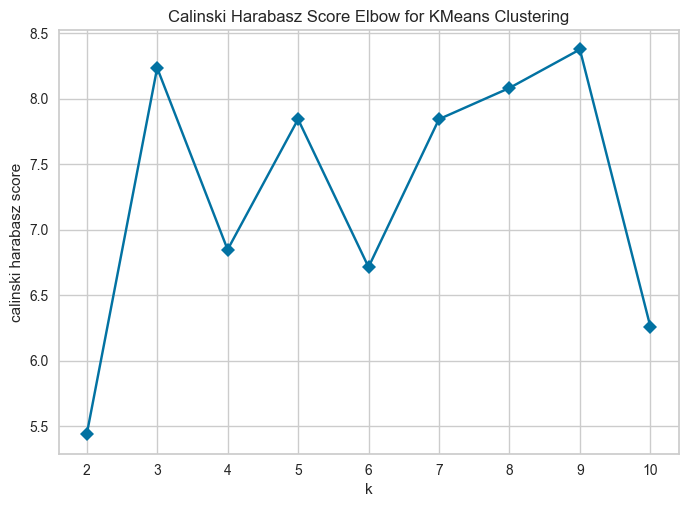

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [108]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
x=normalizer.fit_transform(movement)
model = KMeans(max_iter=1000)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()

In [109]:
from sklearn.pipeline import make_pipeline

k=7

normalizer = Normalizer()

kmeans = KMeans(n_clusters=k, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)

In [110]:
pipeline.fit(movement)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=7))])

In [111]:
labels = pipeline.predict(movement)

df = pd.DataFrame({'labels': labels, 'companies': markets})

df.sort_values('labels')

,labels,companies
25,0,VIC.VN
5,0,FPT.VN
17,0,SSB.VN
29,1,VRE.VN
24,1,VIB.VN
20,1,TCB.VN
7,1,GVR.VN
9,1,HPG.VN
10,1,MBB.VN
13,1,PLX.VN


In [112]:
x=normalizer.fit_transform(movement)
calinski_harabasz_score(x,labels)

7.577157479056892

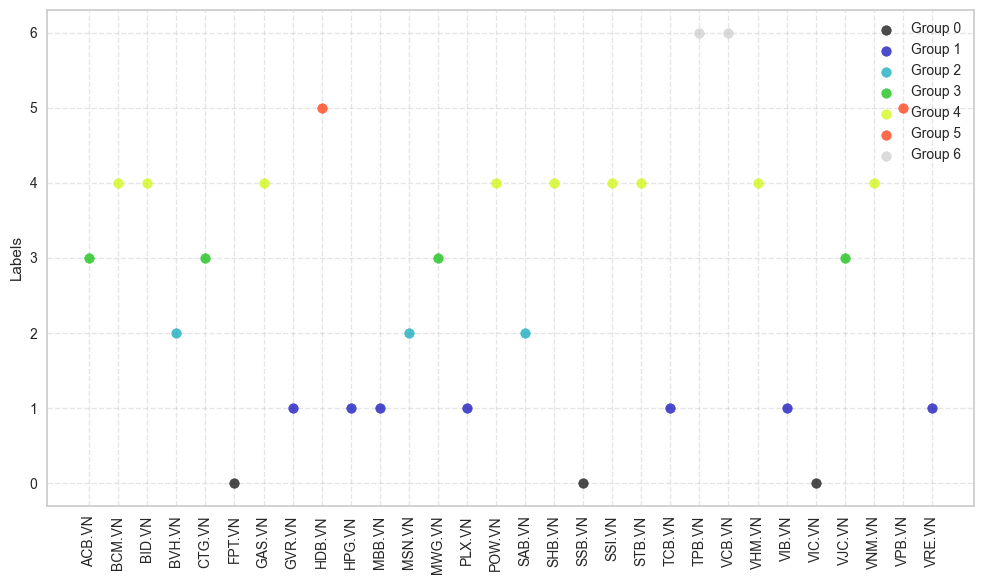

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
num_clusters = len(df['labels'].unique())
colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

for label, color in zip(range(num_clusters), colors):
    subset = df[df['labels'] == label]
    plt.scatter(subset.index, subset['labels'], color=color, label=f'Group {label}', alpha=0.7)

plt.xticks(range(len(df)), df['companies'], rotation=90)
plt.xlabel('', rotation=90)
plt.ylabel('Labels')
plt.title('')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)  # Thêm grid
plt.tight_layout()
plt.show()

In [114]:
calinski_harabasz_score(x,labels)

7.577157479056892

## Kmedoids

In [115]:
from sklearn_extra.cluster import KMedoids

### Calculate Calinski-Harabasz for k from 2 to 10

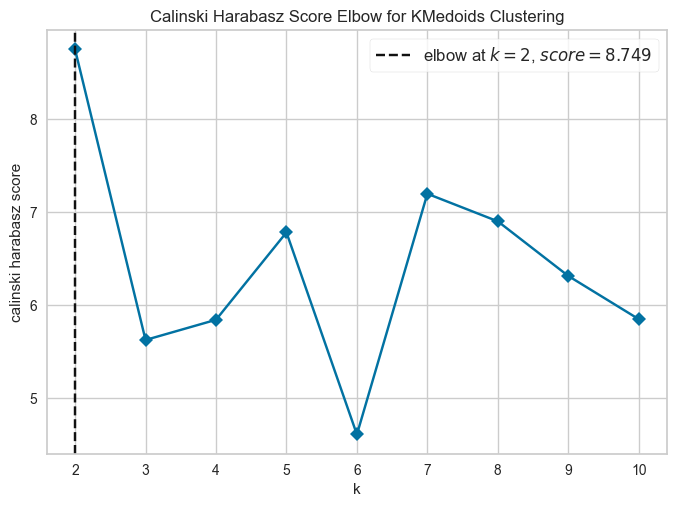

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer
x=normalizer.fit_transform(movement)
model = KMedoids(max_iter=1000,init="random")
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()

### Kmedoids

In [117]:
k=3
kmedoids = KMedoids(n_clusters=k, max_iter=1000)

kmedoids_pipeline = make_pipeline(normalizer,kmedoids)

In [118]:
pipeline_1.fit(movement)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmedoids', KMedoids(max_iter=1000, n_clusters=3))])

In [119]:
labels_1 = pipeline_1.predict(movement)

df = pd.DataFrame({'labels': labels_1, 'companies': markets})

df.sort_values('labels')

    labels companies
29       0    VRE.VN
24       0    VIB.VN
21       0    TPB.VN
20       0    TCB.VN
7        0    GVR.VN
8        0    HDB.VN
9        0    HPG.VN
10       0    MBB.VN
28       0    VPB.VN
13       0    PLX.VN
26       1    VJC.VN
18       1    SSI.VN
17       1    SSB.VN
0        1    ACB.VN
5        1    FPT.VN
4        1    CTG.VN
12       1    MWG.VN
11       2    MSN.VN
15       2    SAB.VN
16       2    SHB.VN
6        2    GAS.VN
19       2    STB.VN
3        2    BVH.VN
22       2    VCB.VN
23       2    VHM.VN
2        2    BID.VN
25       2    VIC.VN
1        2    BCM.VN
27       2    VNM.VN
14       2    POW.VN


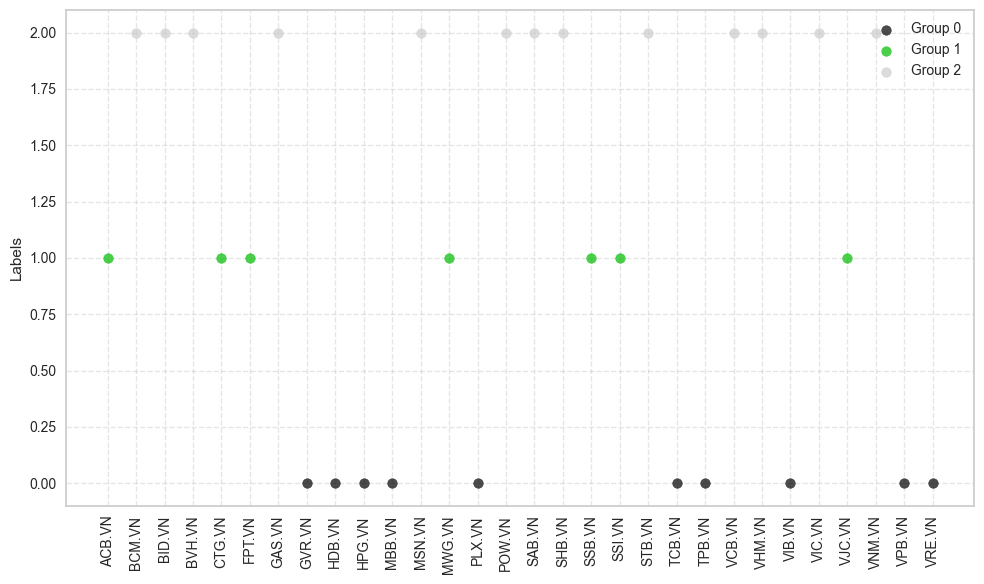

In [120]:
plt.figure(figsize=(10, 6))
num_clusters = len(df['labels'].unique())
colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

for label, color in zip(range(num_clusters), colors):
    subset = df[df['labels'] == label]
    plt.scatter(subset.index, subset['labels'], color=color, label=f'Group {label}', alpha=0.7)

plt.xticks(range(len(df)), df['companies'], rotation=90)
plt.xlabel('', rotation=90)
plt.ylabel('Labels')
plt.title('')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)  # Thêm grid
plt.tight_layout()
plt.show()